# 1. BUSINESS UNDERSTANDING

# 2. DATA UNDERSTANDING

## 2.1. Import Libraries

In [129]:
# ====== Data Handling ======
import pandas as pd
import numpy as np
import ast
from collections import Counter
import calendar

# ====== Visualization ======
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
import contextily as ctx

# ====== Preprocessing ======
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer, PowerTransformer, QuantileTransformer

# ====== Regression & Tree Models ======
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from scipy.stats import randint, uniform

# ====== Clustering ======
from sklearn.cluster import KMeans

# ====== Correlation & Statistics ======
from scipy.stats import pearsonr, spearmanr
from scipy.stats import skew, kurtosis

# ====== NLP ======
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from bertopic import BERTopic

# ====== Geospatial ======
import geopandas as gpd
import folium
from folium.features import GeoJsonTooltip
from shapely.geometry import Point
from branca.element import Template, MacroElement, Element


# ====== Utilities ======
import warnings
warnings.filterwarnings("ignore")
import joblib
from joblib import dump
import pickle


from scipy.stats import randint, uniform

## 2.2. Loading the Datasets

In [74]:
future_calendar = pd.read_csv("data/future_calendar_rates.csv")
listings_data = pd.read_csv("data/listings_data.csv")
#listings = pd.read_csv("data/listings.csv")
past_calendar = pd.read_csv("data/past_calendar_rates.csv")
reviews = pd.read_csv("data/reviews_data.csv")

## 2.3. Dataset Examination
### 2.3.1 Checking the datasets columns and shape

In [75]:
datasets = {
    "future_calendar": future_calendar,
    "listings_data": listings_data,
    "past_calendar": past_calendar,
    "reviews": reviews
}

for name, df in datasets.items():
    print(f"\n{name}:")
    print(f"Shape: {df.shape}")
    print("Columns:", df.columns.to_list())
    
    


future_calendar:
Shape: (3480, 14)
Columns: ['listing_id', 'date', 'vacant_days', 'reserved_days', 'occupancy', 'revenue', 'rate_avg', 'booked_rate_avg', 'booking_lead_time_avg', 'length_of_stay_avg', 'min_nights_avg', 'native_booked_rate_avg', 'native_rate_avg', 'native_revenue']

listings_data:
Shape: (300, 61)
Columns: ['listing_id', 'listing_name', 'listing_type', 'room_type', 'cover_photo_url', 'photos_count', 'host_id', 'host_name', 'cohost_ids', 'cohost_names', 'superhost', 'latitude', 'longitude', 'guests', 'bedrooms', 'beds', 'baths', 'registration', 'amenities', 'instant_book', 'min_nights', 'cancellation_policy', 'currency', 'cleaning_fee', 'extra_guest_fee', 'num_reviews', 'rating_overall', 'rating_accuracy', 'rating_checkin', 'rating_cleanliness', 'rating_communication', 'rating_location', 'rating_value', 'ttm_revenue', 'ttm_revenue_native', 'ttm_avg_rate', 'ttm_avg_rate_native', 'ttm_occupancy', 'ttm_adjusted_occupancy', 'ttm_revpar', 'ttm_revpar_native', 'ttm_adjusted_r

### 2.3.2 Displaying the last 5 rows of each dataset

In [76]:
print("future_calendar")
future_calendar.tail()

future_calendar


listing_id        date  vacant_days  reserved_days  occupancy  revenue  \
3475     3956790  01/03/2026           31              0      0.000        0   
3476     3956790  01/05/2026           31              0      0.000        0   
3477    11976359  01/03/2026           31              0      0.000        0   
3478     3956790  01/10/2025           14             17      0.548      497   
3479     3956790  01/09/2025           19             11      0.367      321   

      rate_avg  booked_rate_avg  booking_lead_time_avg  length_of_stay_avg  \
3475      30.6              NaN                    NaN                 NaN   
3476      31.2              NaN                    NaN                 NaN   
3477      21.9              NaN                    NaN                 NaN   
3478      29.5             29.2                   45.0                 4.0   
3479      28.2             29.2                   46.0                10.0   

      min_nights_avg  native_booked_rate_avg  native_rate_avg  native_revenue  
3475             2.0                     NaN             3954               0  
3476             2.0                     NaN             4031               0  
3477             1.0                     NaN             2830               0  
3478             2.0                  3773.0             3812           64214  
3479             2.0                  3773.0             3644           41474

In [77]:
print("listings_data")
listings_data.tail()

listings_data


listing_id                                       listing_name  \
295    41725548                 Aoukings Place Home Away from Home   
296    41759384    Furnished & serviced 2 bed behind Junction Mall   
297    41817931               One bedroom apartment in  kileleshwa   
298    41818959                        Studio apartment in kileưwa   
299    41825730  A comfortable and classy property in a leafy area   

           listing_type    room_type  \
295  Entire rental unit  entire_home   
296  Entire rental unit  entire_home   
297  Entire rental unit  entire_home   
298  Entire rental unit  entire_home   
299   Entire guesthouse  entire_home   

                                       cover_photo_url  photos_count  \
295  https://a0.muscache.com/im/pictures/airflow/Ho...            27   
296  https://a0.muscache.com/im/pictures/82937564-7...            19   
297  https://a0.muscache.com/im/pictures/hosting/Ho...            35   
298  https://a0.muscache.com/im/pictures/d7ffacd4-e...            40   
299  https://a0.muscache.com/im/pictures/70af2d79-1...            10   

       host_id    host_name cohost_ids cohost_names  ...  l90d_occupancy  \
295  135314917  Aouki Padox        NaN          NaN  ...           0.289   
296  190480480       Wandia        NaN          NaN  ...           0.000   
297  308523342      Damaris  433517328        Nelly  ...           0.000   
298  308523342      Damaris  433517328        Nelly  ...           0.000   
299  330570443         Jane        NaN          NaN  ...           0.000   

     l90d_adjusted_occupancy  l90d_revpar  l90d_revpar_native  \
295                    0.382          6.3               815.4   
296                    0.000          0.0                 0.0   
297                    0.000          0.0                 0.0   
298                    0.000          0.0                 0.0   
299                    0.000          0.0                 0.0   

     l90d_adjusted_revpar  l90d_adjusted_revpar_native  l90d_reserved_days  \
295                   8.4                       1079.2                  26   
296                   0.0                          0.0                   0   
297                   0.0                          0.0                   0   
298                   0.0                          0.0                   0   
299                   0.0                          0.0                   0   

    l90d_blocked_days l90d_available_days l90d_total_days  
295                22                  64              90  
296                 0                  90              90  
297                30                  90              90  
298                27                  90              90  
299                 0                  90              90  

[5 rows x 61 columns]

In [78]:
print("past_calendar")
past_calendar.tail()

past_calendar


listing_id        date  vacant_days  reserved_days  occupancy  revenue  \
3537    34539707  01/11/2024           15             15      0.500      257   
3538    34539707  01/01/2025            6             25      0.806      367   
3539    34539707  01/04/2025           21              9      0.300      144   
3540    34539707  01/06/2025           22              8      0.267      131   
3541    34539707  01/09/2024           21              9      0.300      158   

      rate_avg  booked_rate_avg  booking_lead_time_avg  length_of_stay_avg  \
3537      16.7             17.1                    2.0                15.0   
3538      14.5             14.7                   10.0                 6.0   
3539      15.0             16.0                   10.0                 4.0   
3540      15.8             16.4                    5.0                 8.0   
3541      17.4             17.6                   29.0                 4.0   

      min_nights_avg  native_booked_rate_avg  native_rate_avg  native_revenue  
3537             NaN                  2206.0             2154           33153  
3538             2.0                  1899.0             1873           47405  
3539             2.0                  2072.0             1943           18648  
3540             2.0                  2119.0             2041           16926  
3541             NaN                  2274.0             2248           20410

In [79]:
print("reviews")
reviews.tail()

reviews


listing_id        date  num_reviews                          reviewers
992    38693256  01/02/2025            2             40,107,990,118,239,300
993    38693256  01/04/2025            3  4,791,628,773,071,280,000,000,000
994    13453034  01/03/2025            1                           12933466
995    13453034  01/12/2024            1                           21443423
996    39290226  01/10/2024            2            135,349,052,277,424,000

### 2.3.3 Data types, Summary Statistics, Missing & Unique Values for the datasets

In [80]:
# Function to check the data type, summary statistics, missing and unique values
def datatypes_summary(df):
    dtypes_summary = pd.DataFrame({
        'Column': df.columns,
        'Data Type': df.dtypes,
        'Non-null Count': df.notnull().sum(),
        'Null Count': df.isnull().sum(),
        'Unique Values': df.nunique().values,
        'Missing %': (df.isnull().sum()/len(df)*100).round(2).values,
        #'Most Common Data Type': df.dtypes.value_counts().idxmax()
    })
    
    # Describe stats (numerical + categorical + datetime)
    stats = df.describe(include='all').transpose()
    stats = stats.reset_index().rename(columns={'index': 'Column'})
    
    #picking trimmed subset of describe stats
    keep_cols = ['Column', 'mean', 'std', 'min', '25%', '50%', 'max', 'top', 'freq']
    stats = stats[[c for c in keep_cols if c in stats.columns]]
    
    # merge summaries
    merged = pd.merge(dtypes_summary, stats, on="Column", how="left")
    
    return merged



In [81]:
# ========================================
# Check data type per data set
# =========================================

print("🔹Future Calendar Data Types:")
display(datatypes_summary(future_calendar))

print("\n 🔹 Listings Data Types")
display(datatypes_summary(listings_data))

print("\n 🔹 Past Calender Data Types:")
display(datatypes_summary(past_calendar))

print("\n 🔹 Reviews Data Types")
display(datatypes_summary(reviews))

🔹Future Calendar Data Types:


Column Data Type  Non-null Count  Null Count  \
0               listing_id     int64            3480           0   
1                     date    object            3480           0   
2              vacant_days     int64            3480           0   
3            reserved_days     int64            3480           0   
4                occupancy   float64            3480           0   
5                  revenue     int64            3480           0   
6                 rate_avg   float64            3480           0   
7          booked_rate_avg   float64             389        3091   
8    booking_lead_time_avg   float64             243        3237   
9       length_of_stay_avg   float64             243        3237   
10          min_nights_avg   float64            3283         197   
11  native_booked_rate_avg   float64             389        3091   
12         native_rate_avg     int64            3480           0   
13          native_revenue     int64            3480           0   

    Unique Values  Missing %             mean              std       min  \
0             290       0.00  27742328.955172  11666504.832148  471581.0   
1              12       0.00              NaN              NaN       NaN   
2              31       0.00        28.672414         6.310099       0.0   
3              30       0.00         1.744253         6.241024       0.0   
4              59       0.00         0.057449         0.205619       0.0   
5             352       0.00       100.619828       395.483759       0.0   
6            1033       0.00        57.618218        49.135821       9.6   
7             302      88.82        73.882005        92.313188       9.9   
8             159      93.02       124.893004        93.435027       1.0   
9              49      93.02        18.255144        36.608278       1.0   
10             10       5.66         2.353945         4.238355       1.0   
11            302      88.82       9545.81491     11927.191334    1279.0   
12           1033       0.00      7444.483333      6348.519325    1240.0   
13            352       0.00     13000.441379     51097.914151       0.0   

           25%         50%         max         top freq  
0   19581431.0  30534791.0  41825730.0         NaN  NaN  
1          NaN         NaN         NaN  01/11/2025  290  
2         30.0        31.0        31.0         NaN  NaN  
3          0.0         0.0        31.0         NaN  NaN  
4          0.0         0.0         1.0         NaN  NaN  
5          0.0         0.0      7696.0         NaN  NaN  
6       33.175        48.5       655.0         NaN  NaN  
7         36.0        51.6       650.3         NaN  NaN  
8         45.0       111.0       373.0         NaN  NaN  
9          2.0         5.0       239.0         NaN  NaN  
10         1.0         1.0        31.0         NaN  NaN  
11      4651.0      6667.0     84021.0         NaN  NaN  
12     4286.75      6266.0     84628.0         NaN  NaN  
13         0.0         0.0    994351.0         NaN  NaN


 🔹 Listings Data Types


Column Data Type  Non-null Count  Null Count  \
0                    listing_id     int64             300           0   
1                  listing_name    object             300           0   
2                  listing_type    object             300           0   
3                     room_type    object             300           0   
4               cover_photo_url    object             300           0   
..                          ...       ...             ...         ...   
56  l90d_adjusted_revpar_native   float64             300           0   
57           l90d_reserved_days     int64             300           0   
58            l90d_blocked_days     int64             300           0   
59          l90d_available_days     int64             300           0   
60              l90d_total_days     int64             300           0   

    Unique Values  Missing %         mean              std       min  \
0             300        0.0  27654000.57  11685284.945291  471581.0   
1             299        0.0          NaN              NaN       NaN   
2              29        0.0          NaN              NaN       NaN   
3               3        0.0          NaN              NaN       NaN   
4             298        0.0          NaN              NaN       NaN   
..            ...        ...          ...              ...       ...   
56             81        0.0   598.296667       1431.24471       0.0   
57             59        0.0        14.98        18.517088       0.0   
58             52        0.0        12.76        22.581308       0.0   
59             59        0.0        75.02        18.517088       5.0   
60              1        0.0         90.0              0.0      90.0   

            25%         50%         max  \
0   19541569.25  30285731.0  41825730.0   
1           NaN         NaN         NaN   
2           NaN         NaN         NaN   
3           NaN         NaN         NaN   
4           NaN         NaN         NaN   
..          ...         ...         ...   
56          0.0         0.0      9809.4   
57          0.0         7.0        85.0   
58          0.0         0.0        90.0   
59         68.0        83.0        90.0   
60         90.0        90.0        90.0   

                                                  top freq  
0                                                 NaN  NaN  
1                   Bonsai Villa - Standard King Room    2  
2                                  Entire rental unit  128  
3                                         entire_home  252  
4   https://a0.muscache.com/im/pictures/7a748e4f-d...    3  
..                                                ...  ...  
56                                                NaN  NaN  
57                                                NaN  NaN  
58                                                NaN  NaN  
59                                                NaN  NaN  
60                                                NaN  NaN  

[61 rows x 14 columns]


 🔹 Past Calender Data Types:


Column Data Type  Non-null Count  Null Count  \
0               listing_id     int64            3542           0   
1                     date    object            3542           0   
2              vacant_days     int64            3542           0   
3            reserved_days     int64            3542           0   
4                occupancy   float64            3542           0   
5                  revenue     int64            3542           0   
6                 rate_avg   float64            3542           0   
7          booked_rate_avg   float64            1875        1667   
8    booking_lead_time_avg   float64            1668        1874   
9       length_of_stay_avg   float64            1668        1874   
10          min_nights_avg   float64            2380        1162   
11  native_booked_rate_avg   float64            1875        1667   
12         native_rate_avg     int64            3542           0   
13          native_revenue     int64            3542           0   

    Unique Values  Missing %            mean              std       min  \
0             300       0.00  27698186.96725  11679046.008305  471581.0   
1              12       0.00             NaN              NaN       NaN   
2              32       0.00       24.111801         8.779706       0.0   
3              32       0.00        6.302654         8.745056       0.0   
4              87       0.00        0.207335         0.287834       0.0   
5            1043       0.00      350.712592       759.855315       0.0   
6            1061       0.00       56.302061        52.971477       8.7   
7             822      47.06         57.1528        58.755585       9.0   
8             169      52.91       27.218825         44.23383       1.0   
9              58      52.91        8.058153         9.810054       1.0   
10             15      32.81        2.352941         4.175104       1.0   
11           1468      47.06     7384.485333      7589.300628    1163.0   
12           2368       0.00     7274.477132        6844.2532    1124.0   
13           1681       0.00    45314.456804     98140.055884       0.0   

           25%         50%         max         top freq  
0   19581431.0  30308601.0  41825730.0         NaN  NaN  
1          NaN         NaN         NaN  01/12/2024  299  
2         20.0        28.0        31.0         NaN  NaN  
3          0.0         1.0        31.0         NaN  NaN  
4          0.0       0.033         1.0         NaN  NaN  
5          0.0        54.5     18203.0         NaN  NaN  
6         31.4        46.7       791.5         NaN  NaN  
7        31.45        46.0       774.8         NaN  NaN  
8          1.0        11.0       352.0         NaN  NaN  
9          2.0         5.0        97.0         NaN  NaN  
10         1.0         1.0        31.0         NaN  NaN  
11      4059.0      5955.0    100088.0         NaN  NaN  
12     4056.25      6045.5    102246.0         NaN  NaN  
13         0.0      7057.5   2348193.0         NaN  NaN


 🔹 Reviews Data Types


Column Data Type  Non-null Count  Null Count  Unique Values  \
0   listing_id     int64             997           0            242   
1         date    object             997           0             12   
2  num_reviews     int64             997           0             10   
3    reviewers    object             997           0            975   

   Missing %             mean              std       min         25%  \
0        0.0  27924462.058175  11545800.209521  471581.0  20040341.0   
1        0.0              NaN              NaN       NaN         NaN   
2        0.0         1.673019         1.150085       1.0         1.0   
3        0.0              NaN              NaN       NaN         NaN   

          50%         max         top freq  
0  31922701.0  41825730.0         NaN  NaN  
1         NaN         NaN  01/12/2024  112  
2         1.0        12.0         NaN  NaN  
3         NaN         NaN   104220019    3

## 2.4 Data Cleaning 

1. **Remove duplicate:** Ensure each row is unique

2. **Handle Missing Values:**
    * Categorical/text columns → Fill with "Unknown" and standardize text
    * Numerical Columns → Fill with median value
    * Date Columns → Fill with the earliest date

3. Convert Data Types:
    * Columns containing "date" → Convert to datetime format
    * Numeric looking strings → Convert to numeric type where possible

The function is applied to all datasets (i.e. future_calendar, listings_data, past_calendar, and reviews) to standardize and prepare them for analysis 

In [82]:
# ==============
# Data Cleaning
# ===============

def clean_df(df, dataset_name):
    print(f"\n🔹Cleaning {dataset_name}...")
    
    #print("\n--- Before Cleaning ---")
    #display(datatypes_summary(df))
    
    # 1. Remove duplicates
    df = df.drop_duplicates()
    print(f"Removed duplicates → New shape: {df.shape}")
    
    # 2. Handling missing values
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = (
                df[col]
                .fillna("Unknown")
                .astype(str)
                .str.strip()
                .str.lower()
                .str.replace(r"\s+", " ", regex=True)
            )
        elif pd.api.types.is_numeric_dtype(df[col]):
            df[col] = df[col].fillna(df[col].median())
        elif pd.api.types.is_datetime64_any_dtype(df[col]):
            df[col] = df[col].fillna(df[col].min())
            
    # 3. Convert data types
    for col in df.columns:
        # Convert object columns that look like dates
        if "date" in col.lower() or pd.api.types.is_datetime64_dtype(df[col]):
                converted = pd.to_datetime(df[col], errors="coerce")
                if converted.notnull().sum() > 0: # only replace if some values converted
                    df[col] = converted
                    
        # Convert numeric looking strings
        if df[col].dtype == 'object':
            converted = pd.to_numeric(df[col], errors="coerce")
            if converted.notnull().sum() > 0:
                df[col] = converted.fillna(df[col])
                
    print(f"Finished cleaning {dataset_name}.")
    #print(f"Remaining nulls: {df.isnull().sum()} total") 
    
    #print("\n--- After Cleaning ---")
    return df         

In [83]:
# Applying cleaning function to each dataset
future_calendar = clean_df(future_calendar, "Future Calendar")
listings_data = clean_df(listings_data, "Listings")
past_calendar = clean_df(past_calendar, "Past Calendar")
reviews = clean_df(reviews, "Reviews")


🔹Cleaning Future Calendar...
Removed duplicates → New shape: (3480, 14)
Finished cleaning Future Calendar.

🔹Cleaning Listings...
Removed duplicates → New shape: (300, 61)
Finished cleaning Listings.

🔹Cleaning Past Calendar...
Removed duplicates → New shape: (3542, 14)
Finished cleaning Past Calendar.

🔹Cleaning Reviews...
Removed duplicates → New shape: (997, 4)
Finished cleaning Reviews.


## 2.5 Merge the Data

1. **Merge reviews into listings:**
    - `listings_data` is joined with `reviews` on `listing_id` using a left join to keep all listings

2. **Combine Past and Future calendars:**
    - `past_calendar` and `future_calendar` are concatenated vertically to form a complete calendar dataset

3. **Merge calendar with listings and reviews:**
    - The combined calendar is merged with `listings_reviews` on `listing_id` using a left join to create `master_df`

In [84]:
# 1. Merge reviews into listings
listings_reviews = listings_data.merge(reviews, on="listing_id", how="left")

# 2. Combine Past and Future calendars
calendar_all = pd.concat([past_calendar, future_calendar], axis=0) 

# 3. Merge calendar with listings and reviews
master_df = listings_reviews.merge(calendar_all, on="listing_id", how="left")

#4. Check result
print("Master dataset shape:", master_df.shape)
print("Master dataset columns:", master_df.columns.tolist())

Master dataset shape: (25117, 77)
Master dataset columns: ['listing_id', 'listing_name', 'listing_type', 'room_type', 'cover_photo_url', 'photos_count', 'host_id', 'host_name', 'cohost_ids', 'cohost_names', 'superhost', 'latitude', 'longitude', 'guests', 'bedrooms', 'beds', 'baths', 'registration', 'amenities', 'instant_book', 'min_nights', 'cancellation_policy', 'currency', 'cleaning_fee', 'extra_guest_fee', 'num_reviews_x', 'rating_overall', 'rating_accuracy', 'rating_checkin', 'rating_cleanliness', 'rating_communication', 'rating_location', 'rating_value', 'ttm_revenue', 'ttm_revenue_native', 'ttm_avg_rate', 'ttm_avg_rate_native', 'ttm_occupancy', 'ttm_adjusted_occupancy', 'ttm_revpar', 'ttm_revpar_native', 'ttm_adjusted_revpar', 'ttm_adjusted_revpar_native', 'ttm_reserved_days', 'ttm_blocked_days', 'ttm_available_days', 'ttm_total_days', 'l90d_revenue', 'l90d_revenue_native', 'l90d_avg_rate', 'l90d_avg_rate_native', 'l90d_occupancy', 'l90d_adjusted_occupancy', 'l90d_revpar', 'l90d_

# 3. EXPLORATORY DATA ANALYSIS

## 3.1 Univariate Analysis


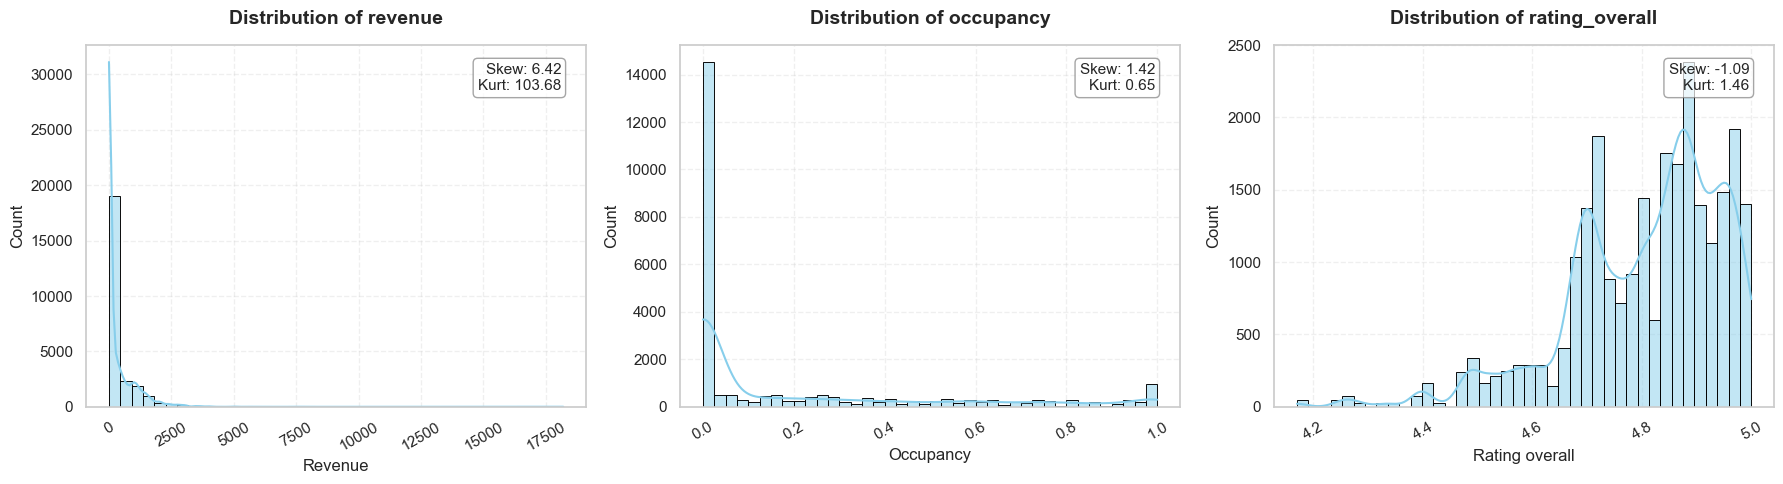

In [85]:
sns.set_theme(style="whitegrid")
num_cols = ["revenue", "occupancy", "rating_overall"]

#plot in groups of three
for i in range (0, len(num_cols), 3):
    cols_subset = num_cols[i:i+3]
    fig, axes = plt.subplots(1, len(cols_subset), figsize=(6*len(cols_subset), 5))
    
    if len(cols_subset) == 1:
        axes = [axes] # makes iterable if only one subplot
        
    #plot each numeric column
    for ax, col in zip(axes, cols_subset):
        data = master_df[col].dropna()
        
        #plot histogram with KDE 
        sns.histplot(
            master_df[col].dropna(),
            kde=True, bins=40,
            color="skyblue", edgecolor="black",
            ax=ax
        )
        ax.set_title(f"Distribution of {col}", fontsize=14, fontweight="bold", pad=15)
        ax.set_xlabel(col.replace("_", " ").capitalize(), fontsize=12)
        ax.set_ylabel("Count", fontsize=12)
        ax.tick_params(axis="x", rotation=30)
        ax.grid(alpha=0.3, linestyle="--")
        
        # Compute skewness & kurtosis
        skew_val = skew(data)
        kurt_val = kurtosis(data)
        
        # Decide box color
        if abs(skew_val) > 1 or kurt_val > 3:
            box_color = dict(boxstyle="round,pad=0.3", fc="mistyrose", ec="red", alpha=0.8)
        else:
            box_color = dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.7)
        
        # Add annotation inside the plot (top right corner)
        ax.text(
            0.95, 0.95,
            f"Skew: {skew_val:.2f}\nKurt: {kurt_val:.2f}",
            transform=ax.transAxes,
            fontsize=11,
            fontweight="medium",
            va="top", ha="right",
            bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.7)
        )
    
    plt.tight_layout()
    plt.show()
        

- **Revenue:** Most properties generate very low revenue, with a few high-revenue outliers. The distribution is **right-skewed** with a long tail.  

- **Occupancy:** Many properties have low or zero occupancy, while a smaller number have high occupancy. The distribution is **left-skewed**, with most values near zero.  

- **Overall Rating:** Most properties are rated very highly (4.5–5.0), with peaks at 5.0 and other high scores. The distribution is **right-skewed** and **multimodal**, with very few low ratings.

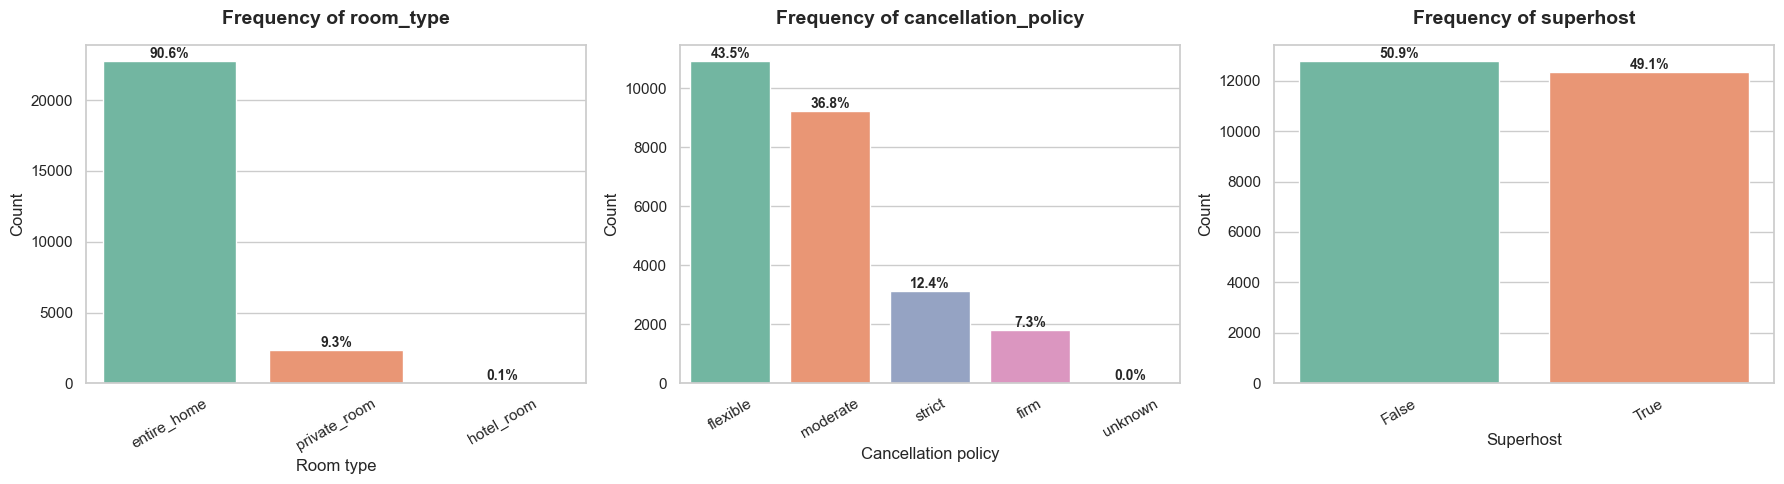

In [86]:
cat_cols = ["room_type", "cancellation_policy", "superhost"]

for i in range(0, len(cat_cols), 3):
    cols_subset = cat_cols[i:i+3]
    fig, axes = plt.subplots(1, len(cols_subset), figsize=(6*len(cols_subset), 5))
    
    if len(cols_subset) == 1:
        axes = [axes]
    
    for ax, col in zip(axes, cols_subset):
        sns.countplot(
            data=master_df,
            x=col,
            order=master_df[col].value_counts().index,
            palette="Set2",
            ax=ax
        )

        total = len(master_df[col])
        for p in ax.patches:
            percentage = f"{100 * p.get_height() / total:.1f}%"
            ax.annotate(percentage, 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='bottom', fontsize=10, fontweight="bold")

        ax.set_title(f"Frequency of {col}", fontsize=14, fontweight="bold", pad=15)
        ax.set_xlabel(col.replace("_", " ").capitalize(), fontsize=12)
        ax.set_ylabel("Count", fontsize=12)
        ax.tick_params(axis='x', rotation=30)
    
    plt.tight_layout()
    plt.show()

- **Room Type:** Most listings are **entire homes/apartments (90.6%)**, followed by **private rooms (9.3%)**, with **hotel rooms** being rare (0.1%).  

- **Cancellation Policy:** **Flexible (43.5%)** and **moderate (36.8%)** policies dominate, while stricter policies (**strict 12.4%, firm 7.3%**) are less common.  

- **Superhost Status:** Listings are nearly evenly split between **superhosts (49.1%)** and **non-superhosts (50.9%)**.


## 3.2 Bivariate Analysis

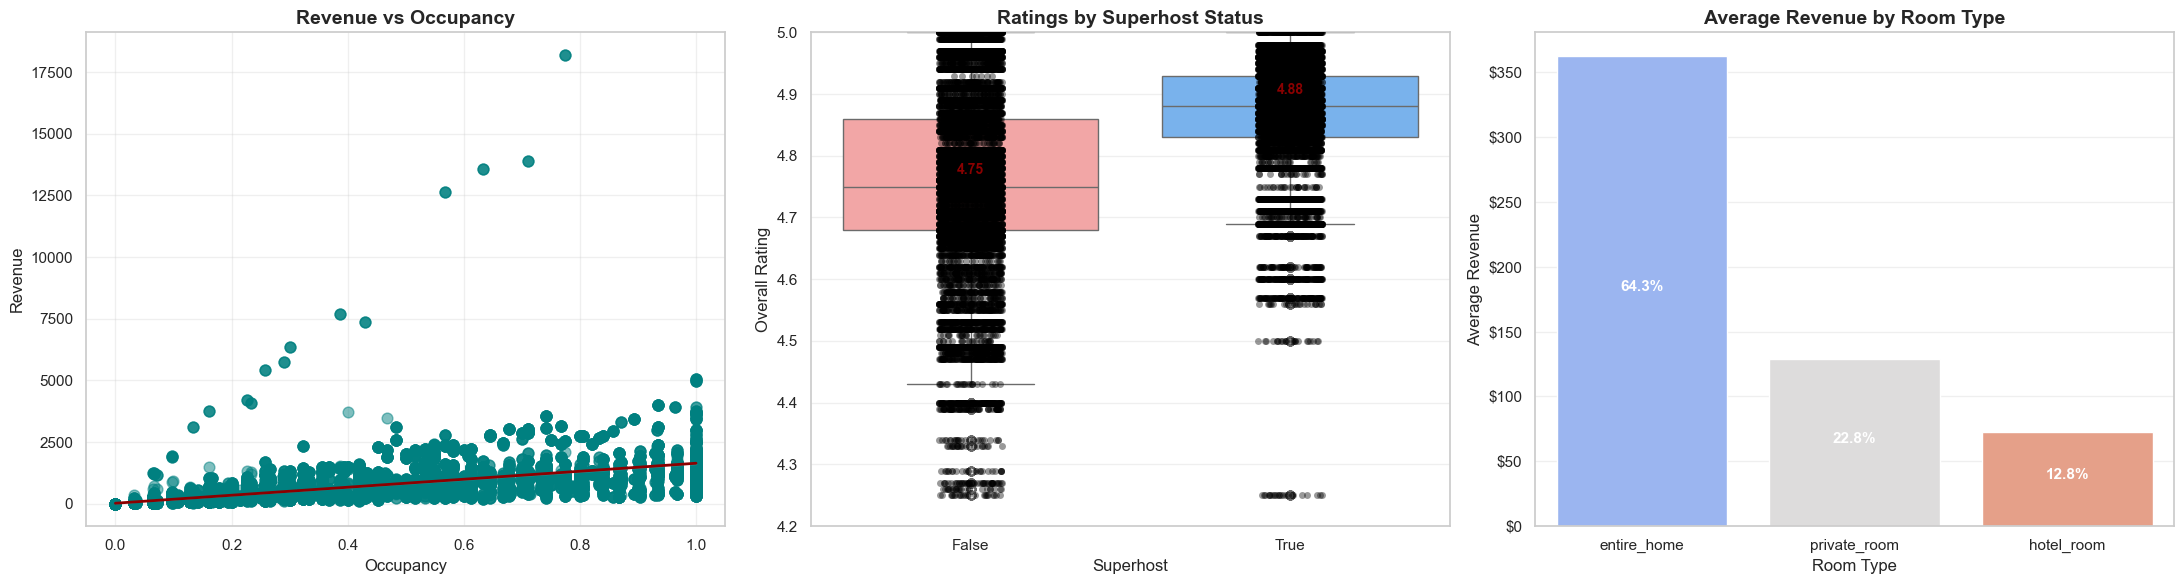

In [87]:
# Set style
sns.set_style("whitegrid")
palette_scatter = "teal"
palette_box = ["#FF9999", "#66B2FF"]
palette_bar = "coolwarm"

# Compute average revenue by room type
room_avg = master_df.groupby("room_type")["revenue"].mean().reset_index()
total_avg_revenue = room_avg["revenue"].sum()
room_avg["pct"] = room_avg["revenue"] / total_avg_revenue * 100

# ✅ Sort room types by revenue (descending)
room_avg = room_avg.sort_values("revenue", ascending=False).reset_index(drop=True)

# Create subplots: 1 row, 3 columns
fig, axes = plt.subplots(1, 3, figsize=(22,6))

# ----------------------------
# 1. Revenue vs Occupancy (Scatter + Trendline)
# ----------------------------
sns.regplot(
    data=master_df, 
    x="occupancy", 
    y="revenue", 
    scatter_kws={"alpha":0.5, "s":60, "color":palette_scatter},
    line_kws={"color":"darkred", "lw":2},
    ax=axes[0]
)
axes[0].set_title("Revenue vs Occupancy", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Occupancy")
axes[0].set_ylabel("Revenue")
axes[0].grid(alpha=0.3)

# ----------------------------
# 2. Ratings vs Superhost (Box + Stripplot)
# ----------------------------
sns.boxplot(
    data=master_df, 
    x="superhost", 
    y="rating_overall", 
    palette=palette_box,
    ax=axes[1]
)
sns.stripplot(
    data=master_df, 
    x="superhost", 
    y="rating_overall", 
    color="black", alpha=0.4, jitter=True,
    ax=axes[1]
)
axes[1].set_title("Ratings by Superhost Status", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Superhost")
axes[1].set_ylabel("Overall Rating")
axes[1].set_ylim(4.2, 5)  
axes[1].grid(axis="y", alpha=0.3)

# Add median labels
medians = master_df.groupby("superhost")["rating_overall"].median()
for idx, median in enumerate(medians):
    axes[1].text(idx, median+0.02, f"{median:.2f}", 
                 ha="center", fontsize=10, fontweight="bold", color="darkred")

# ----------------------------
# 3. Room Type vs Average Revenue (Bar Plot + %)
# ----------------------------
sns.barplot(
    data=room_avg, 
    x="room_type", 
    y="revenue", 
    palette=palette_bar,
    ax=axes[2],
    order=room_avg["room_type"]  # ✅ enforce sorted order
)
axes[2].set_title("Average Revenue by Room Type", fontsize=14, fontweight="bold")
axes[2].set_xlabel("Room Type")
axes[2].set_ylabel("Average Revenue")
axes[2].yaxis.set_major_formatter(mtick.StrMethodFormatter("${x:,.0f}"))  # Currency format
axes[2].grid(axis="y", alpha=0.3)

# Annotate percentages inside bars
for idx, row in room_avg.iterrows():
    axes[2].text(
        idx, row["revenue"]*0.5,  # middle of bar
        f"{row['pct']:.1f}%", 
        ha="center", color="white",
        fontsize=11, fontweight="bold"
    )

# ----------------------------
# Adjust layout and show
# ----------------------------
plt.tight_layout()
plt.show()


- **Revenue vs Occupancy:** Scatter plot shows a **positive correlation**—higher occupancy generally leads to higher revenue, though there are outliers and variability at lower occupancy levels.  

- **Ratings by Superhost Status:** Box plot indicates **superhosts** have higher median ratings and overall better ratings than non-superhosts.  

- **Average Revenue by Room Type:** Bar chart shows **entire homes** generate the most revenue (64.3%), followed by **private rooms (22.8%)**, with **hotel rooms** earning the least (12.8%).


## 3.3 Time-Based Analysis

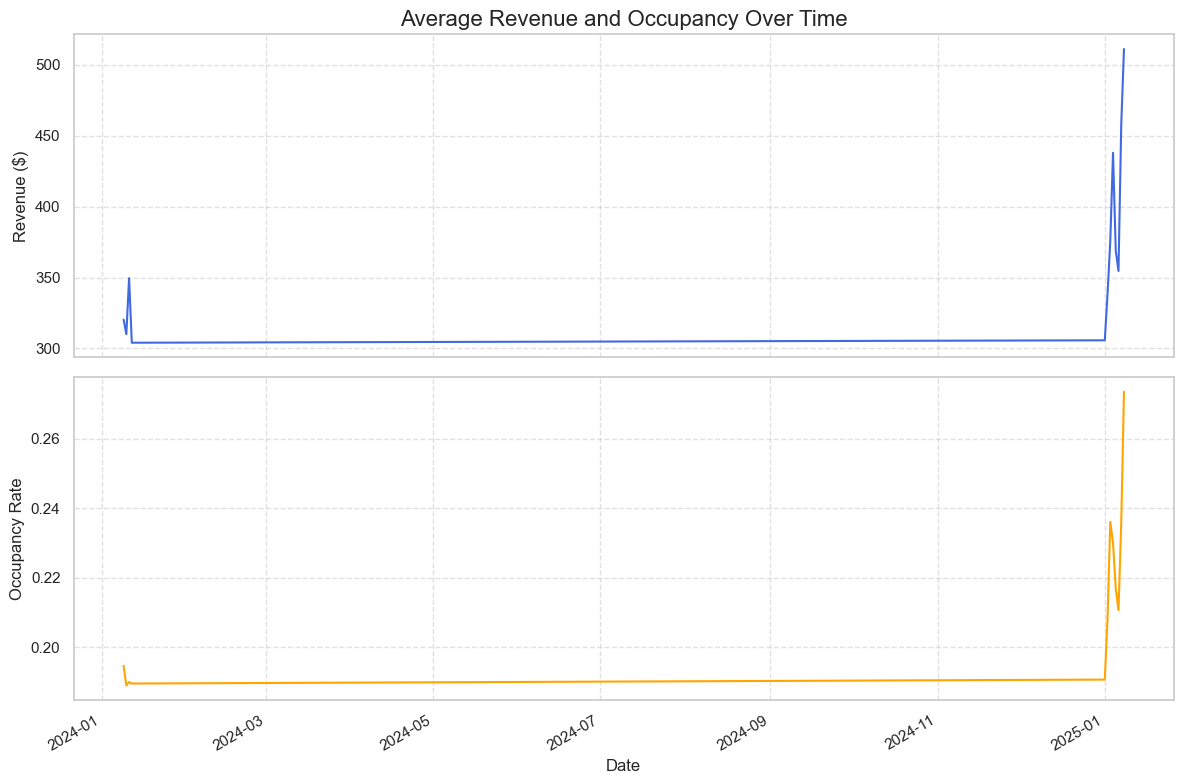

In [88]:
# Create a figure with two subplots that share the same x-axis
fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
daily_summary = master_df.groupby("date_x")[["revenue", "occupancy"]].mean()

# Plot Average Revenue
daily_summary['revenue'].plot(ax=ax[0], color='royalblue')
ax[0].set_title('Average Revenue and Occupancy Over Time', fontsize=16)
ax[0].set_ylabel('Revenue ($)', fontsize=12)
ax[0].grid(True, linestyle='--', alpha=0.6)

# Plot Average Occupancy
daily_summary['occupancy'].plot(ax=ax[1], color='orange')
ax[1].set_ylabel('Occupancy Rate', fontsize=12)
ax[1].set_xlabel('Date', fontsize=12)
ax[1].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout() # Adjusts plot to prevent labels from overlapping
plt.show()

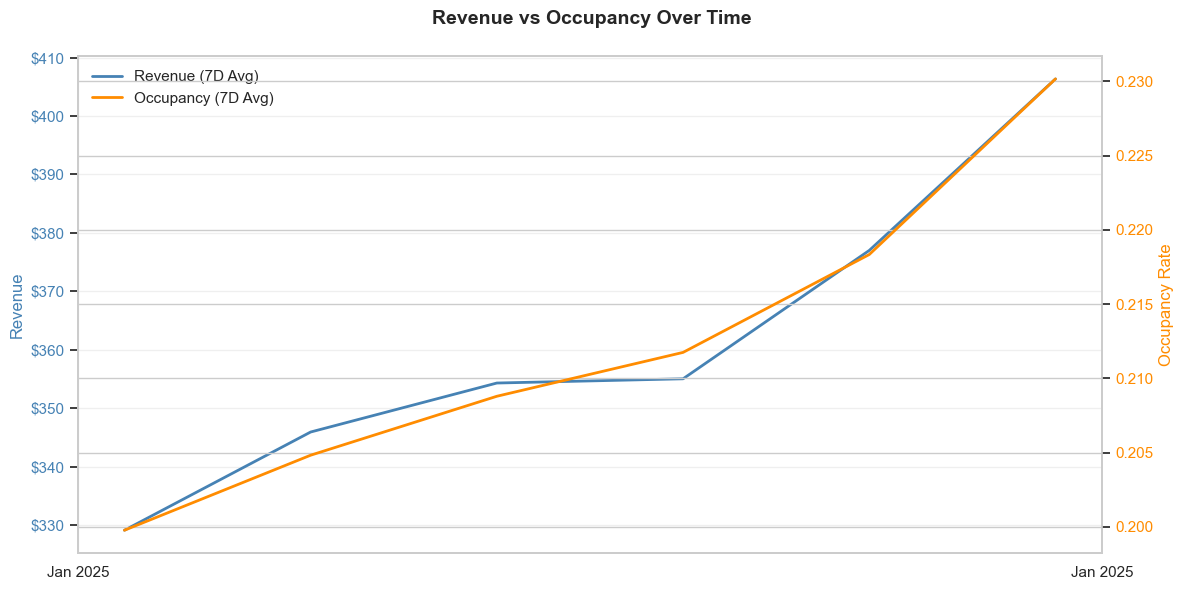

In [89]:
# Ensure datetime
master_df["date_x"] = pd.to_datetime(master_df["date_x"], errors='coerce')

# Sort and group by date
daily_stats = master_df.groupby("date_x")[["revenue", "occupancy"]].mean().sort_index()

# Rolling averages (7-day smoothing)
daily_stats["revenue_smooth"] = daily_stats["revenue"].rolling(7).mean()
daily_stats["occupancy_smooth"] = daily_stats["occupancy"].rolling(7).mean()

# ---------------- Dual-axis Plot ----------------
fig, ax1 = plt.subplots(figsize=(12,6))

# Revenue (left axis)
ax1.plot(daily_stats.index, daily_stats["revenue_smooth"], color="steelblue", lw=2, label="Revenue (7D Avg)")
ax1.set_ylabel("Revenue", color="steelblue", fontsize=12)
ax1.tick_params(axis="y", labelcolor="steelblue")
ax1.yaxis.set_major_formatter(mtick.StrMethodFormatter("${x:,.0f}"))
ax1.grid(alpha=0.3)

# Occupancy (right axis)
ax2 = ax1.twinx()
ax2.plot(daily_stats.index, daily_stats["occupancy_smooth"], color="darkorange", lw=2, label="Occupancy (7D Avg)")
ax2.set_ylabel("Occupancy Rate", color="darkorange", fontsize=12)
ax2.tick_params(axis="y", labelcolor="darkorange")

# Title & formatting
fig.suptitle("Revenue vs Occupancy Over Time", fontsize=14, fontweight="bold")
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.xticks(rotation=45)

# Add legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper left")

plt.tight_layout()
plt.show()


- **Average Revenue:** Fluctuating but generally increasing. Lowest in **Dec 2024 (~300)**, gradually rising to **425 in Apr 2025**, and peaking in **Aug 2025 (>500)**.  

- **Average Occupancy:** Mirrors revenue trends. Low and stable (~20%) from Sep 2024 to Jan 2025, rising to **24% in Mar 2025**, and peaking at **26% in Aug 2025**.  

- **Overall Trend:** Both metrics show a **seasonal pattern**, with highest performance in **summer months (July–August 2025)**. Revenue shows a stronger upward trend, suggesting higher earnings per occupied unit during peak season.


## 3.4 Correlation Analysis

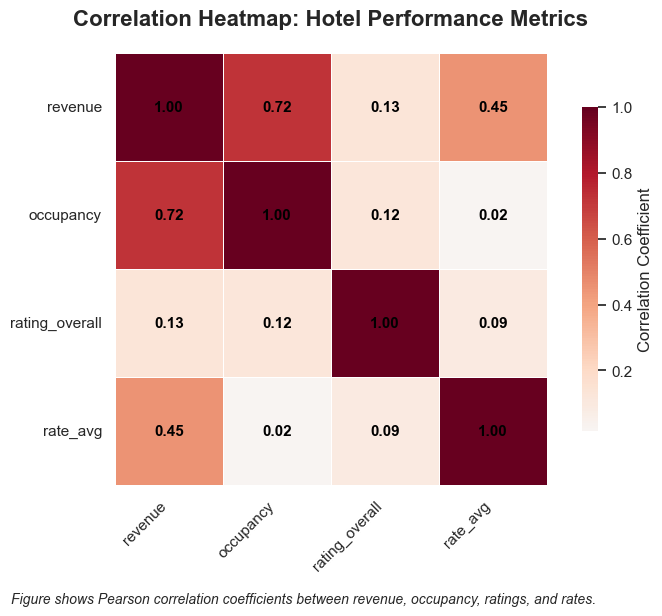

In [90]:
plt.figure(figsize=(8, 6))

# Create the correlation matrix
corr_matrix = master_df[["revenue", "occupancy", "rating_overall", "rate_avg"]].corr()

# Heatmap with refined styling
heatmap = sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="RdBu_r",
    fmt=".2f",
    center=0,
    square=True,
    linewidths=0.7,
    linecolor='white',
    cbar_kws={
        "shrink": 0.75,
        "label": "Correlation Coefficient"
    },
    annot_kws={"size": 11, "weight": "bold", "color": "black"}
)

# Title and axis labels
plt.title("Correlation Heatmap: Hotel Performance Metrics", 
          fontsize=16, fontweight="bold", pad=20)
plt.xticks(rotation=45, ha="right", fontsize=11)
plt.yticks(rotation=0, fontsize=11)

# Layout adjustments
plt.tight_layout()

# Caption
plt.figtext(
    0.5, -0.02,
    "Figure shows Pearson correlation coefficients between revenue, occupancy, ratings, and rates.",
    ha="center", fontsize=10, style="italic", wrap=True
)

plt.show()


- **Revenue & Occupancy (0.72):** Strong positive correlation; higher occupancy generally leads to higher revenue.  
- **Revenue & Average Rate (0.45):** Moderate positive correlation; increasing average price can raise revenue, but less strongly than occupancy.  
- **Occupancy & Average Rate (~0):** No linear correlation; changes in price have little linear effect on occupancy.  
- **Overall Rating & Other Variables:** Very weak correlations (revenue: 0.13, occupancy: ~0); ratings do not strongly impact revenue or occupancy.


## 3.5 Geospatial Analysis

In [91]:
# Drop rows with missing coordinates or key values
df_map = master_df.dropna(subset=["longitude", "latitude", "revenue", "occupancy"])

# Create scatter mapbox
fig = px.scatter_mapbox(
    df_map,
    lat="latitude",
    lon="longitude",
    size="revenue",                        # Bubble size = revenue
    color="occupancy",                     # Bubble color = occupancy
    hover_name="room_type",                # Show room type on hover
    hover_data={
        "revenue": ":,.0f",                # Format revenue with commas
        "occupancy": ":.1f",               # 1 decimal occupancy
        "rating_overall": True,
        "listing_id": True                 # Optional: identify listing
    },
    color_continuous_scale="Viridis",
    size_max=40,
    zoom=11,
    opacity=0.7,                           # 👈 Helps overlapping points
    height=650
)

# Map layout
fig.update_layout(
    mapbox_style="open-street-map",        # Free basemap
    title="🌍 Geographic Distribution of Listings: Revenue vs Occupancy",
    margin={"r":0,"t":50,"l":0,"b":0},
    coloraxis_colorbar=dict(
        title="Occupancy (%)",             # Better colorbar label
        tickformat=".0f"
    )
)

fig.show()


In [ ]:
# Group listings by coordinates
location_counts = (
    master_df.groupby(["latitude", "longitude"])
    .size()
    .reset_index(name="listing_count")
)

# Sort by highest concentration
top_location = location_counts.sort_values("listing_count", ascending=False).head(1)
print("📍 Location with most listings:")
print(top_location)

# Scatter map: size = number of listings
fig = px.scatter_mapbox(
    location_counts,
    lat="latitude",
    lon="longitude",
    size="listing_count",
    color="listing_count",
    color_continuous_scale="Reds",
    hover_data={"listing_count": True},
    zoom=11,
    height=650
)

# Add basemap
fig.update_layout(
    mapbox_style="open-street-map",
    title="🔥 Concentration of Listings by Location",
    margin={"r":0,"t":50,"l":0,"b":0}
)

fig.show()


📍 Location with most listings:
     latitude  longitude  listing_count
256   -1.2481    36.7652            288


In [ ]:
# Drop rows with missing coordinates
df_map = master_df.dropna(subset=["longitude", "latitude"])

# Create density heatmap
fig = px.density_mapbox(
    df_map,
    lat="latitude",
    lon="longitude",
    z=None,                     # If you want weight, you can set z="revenue" or "occupancy"
    radius=15,                  # Smoothing radius (try 10–30 depending on city scale)
    center=dict(
        lat=df_map["latitude"].mean(), 
        lon=df_map["longitude"].mean()
    ),
    zoom=11,
    mapbox_style="open-street-map",
    color_continuous_scale="YlOrRd",
    height=650
)

# Layout
fig.update_layout(
    title="🔥 Listing Density Heatmap",
    margin={"r":0,"t":50,"l":0,"b":0}
)

fig.show()


In [ ]:
# Drop rows with missing coordinates or revenue
df_map = master_df.dropna(subset=["longitude", "latitude", "revenue"])

fig = px.density_mapbox(
    df_map,
    lat="latitude",
    lon="longitude",
    z="revenue",                # 👈 weight by revenue
    radius=20,                  # adjust for smoothness (10–30 works well)
    center=dict(
        lat=df_map["latitude"].mean(),
        lon=df_map["longitude"].mean()
    ),
    zoom=11,
    mapbox_style="open-street-map",
    color_continuous_scale="YlOrRd",
    height=650
)

fig.update_layout(
    title="🔥 Revenue-Weighted Listing Density",
    margin={"r":0,"t":50,"l":0,"b":0}
)

fig.show()


- **Clustering:** Most listings are concentrated around spring Valley, Parklands, Woodley and Kilimani, corresponding to Nairobi city center or popular neighborhoods.  
- **Revenue Hotspots:** Largest circles (high revenue) are mainly within the central cluster, with a few high-revenue outliers outside it.  
- **Occupancy Patterns:** Color variation shows mixed occupancy levels. High revenue does not always correspond to high occupancy, suggesting some listings earn more through higher nightly rates rather than occupancy.


## 3.6  Time Series/Seasonality

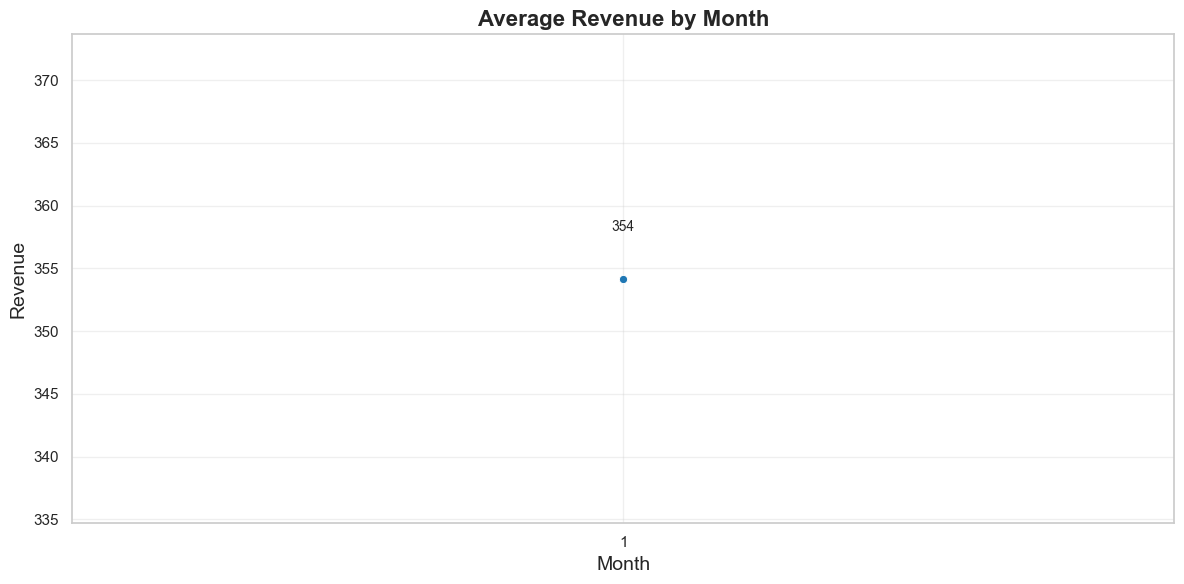

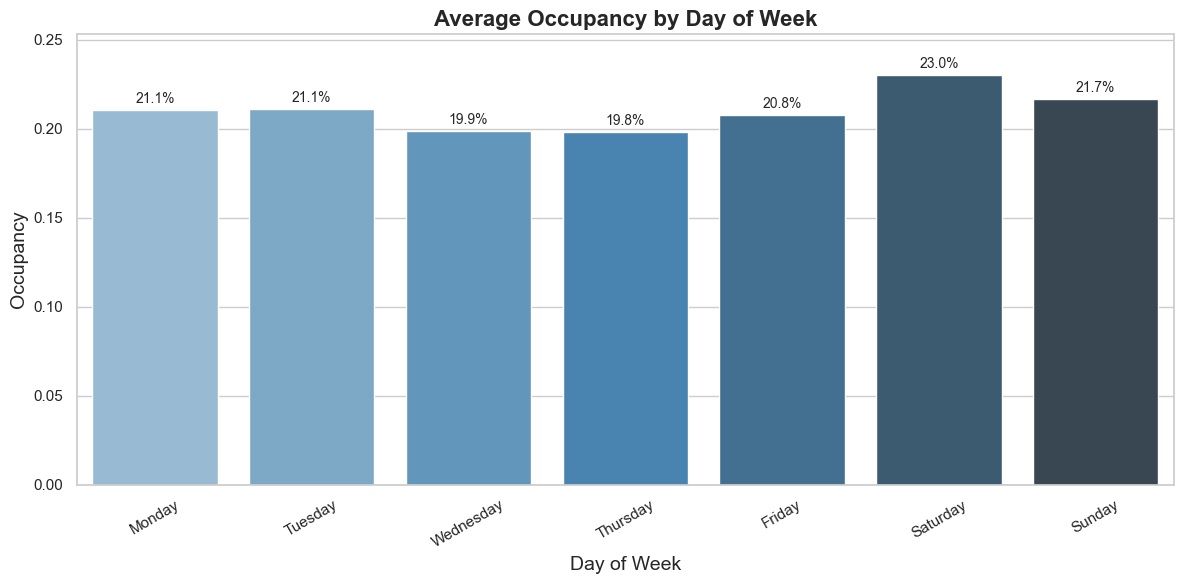

In [116]:

# -------------------------------
# Set style and fonts
# -------------------------------
sns.set_style("whitegrid")
plt.rcParams.update({"font.size": 12})

# -------------------------------
# Extract month and day of week
# -------------------------------
master_df["month"] = master_df["date_x"].dt.month
master_df["day_of_week"] = master_df["date_x"].dt.day_name()

# -------------------------------
# Monthly Revenue Trend
# -------------------------------
monthly_rev = master_df.groupby("month")["revenue"].mean().fillna(0)  # Fill NaNs

plt.figure(figsize=(12,6))
sns.lineplot(
    x=monthly_rev.index, 
    y=monthly_rev.values, 
    marker="o", 
    color="#1f77b4",  # Dark blue
    linewidth=2
)

# Annotate points
for x, y in zip(monthly_rev.index, monthly_rev.values):
    plt.text(x, y + 0.01*y, f"{y:,.0f}", ha='center', va='bottom', fontsize=10)

plt.title("Average Revenue by Month", fontsize=16, fontweight="bold")
plt.xlabel("Month", fontsize=14)
plt.ylabel("Revenue", fontsize=14)
plt.xticks(monthly_rev.index)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# -------------------------------
# Day of Week Occupancy
# -------------------------------
dow_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
dow_occ = master_df.groupby("day_of_week")["occupancy"].mean().reindex(dow_order).fillna(0)

plt.figure(figsize=(12,6))
sns.barplot(x=dow_occ.index, y=dow_occ.values, palette="Blues_d")

# Annotate bars
for i, val in enumerate(dow_occ.values):
    plt.text(i, val + 0.01*val, f"{val:.1%}", ha='center', va='bottom', fontsize=10)

plt.title("Average Occupancy by Day of Week", fontsize=16, fontweight="bold")
plt.ylabel("Occupancy", fontsize=14)
plt.xlabel("Day of Week", fontsize=14)
plt.xticks(rotation=30)
plt.ylim(0, dow_occ.max() * 1.1)  # Safe, no NaNs
plt.tight_layout()
plt.show()


In [113]:
print(master_df["date_x"].head())
print(master_df["date_x"].dtype)
print(master_df["date_x"].min(), "→", master_df["date_x"].max())
print(master_df["month"].unique())


0   2025-01-06
1   2025-01-06
2   2025-01-06
3   2025-01-06
4   2025-01-06
Name: date_x, dtype: datetime64[ns]
datetime64[ns]
2024-01-09 00:00:00 → 2025-01-08 00:00:00
[ 1. nan]


In [117]:
def plot_dow_occupancy(df, date_col="date_x", occ_col="occupancy", by_year=False):
    """
    Plots average occupancy by day of the week.
    If by_year=True, shows separate bars per year for comparison.
    """
    # Ensure datetime
    df[date_col] = pd.to_datetime(df[date_col], errors="coerce")

    if df[date_col].isna().all():
        print("No valid dates in column:", date_col)
        return

    # Extract features
    df["year"] = df[date_col].dt.year
    df["day_of_week"] = df[date_col].dt.day_name()

    # Define weekday order
    dow_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

    plt.figure(figsize=(12, 6))

    if by_year:
        # Case 1: Breakdown by year
        dow_occ = (
            df.groupby(["year", "day_of_week"])[occ_col]
            .mean()
            .unstack(level=0)  # columns = years
            .reindex(dow_order)
            .fillna(0)
        )

        dow_occ.plot(
            kind="bar",
            figsize=(12, 6),
            colormap="Blues",
            width=0.75
        )

        plt.title("Average Occupancy by Day of Week (by Year)", fontsize=16, fontweight="bold")
        plt.ylabel("Occupancy", fontsize=14)
        plt.xlabel("Day of Week", fontsize=14)
        plt.xticks(rotation=30)
        plt.legend(title="Year")
        plt.ylim(0, dow_occ.max().max() * 1.1 if dow_occ.max().max() > 0 else 1)

        # Annotate bars
        for i, day in enumerate(dow_occ.index):
            for j, year in enumerate(dow_occ.columns):
                val = dow_occ.loc[day, year]
                offset = 0.02 * dow_occ.max().max()
                plt.text(i + j * 0.2 - 0.2, val + offset, f"{val:.1%}",
                         ha="center", va="bottom", fontsize=9, rotation=90)

    else:
        # Case 2: Overall averages
        dow_occ = df.groupby("day_of_week")[occ_col].mean().reindex(dow_order).fillna(0)
        sns.barplot(x=dow_occ.index, y=dow_occ.values, palette="Blues_d")

        # Annotate
        offset = 0.02 * dow_occ.max() if dow_occ.max() > 0 else 0.01
        for i, val in enumerate(dow_occ.values):
            plt.text(i, val + offset, f"{val:.1%}", ha="center", va="bottom", fontsize=10)

        plt.title("Average Occupancy by Day of Week", fontsize=16, fontweight="bold")
        plt.ylabel("Occupancy", fontsize=14)
        plt.xlabel("Day of Week", fontsize=14)
        plt.xticks(rotation=30)
        plt.ylim(0, dow_occ.max() * 1.1 if dow_occ.max() > 0 else 1)

    plt.tight_layout()
    plt.show()


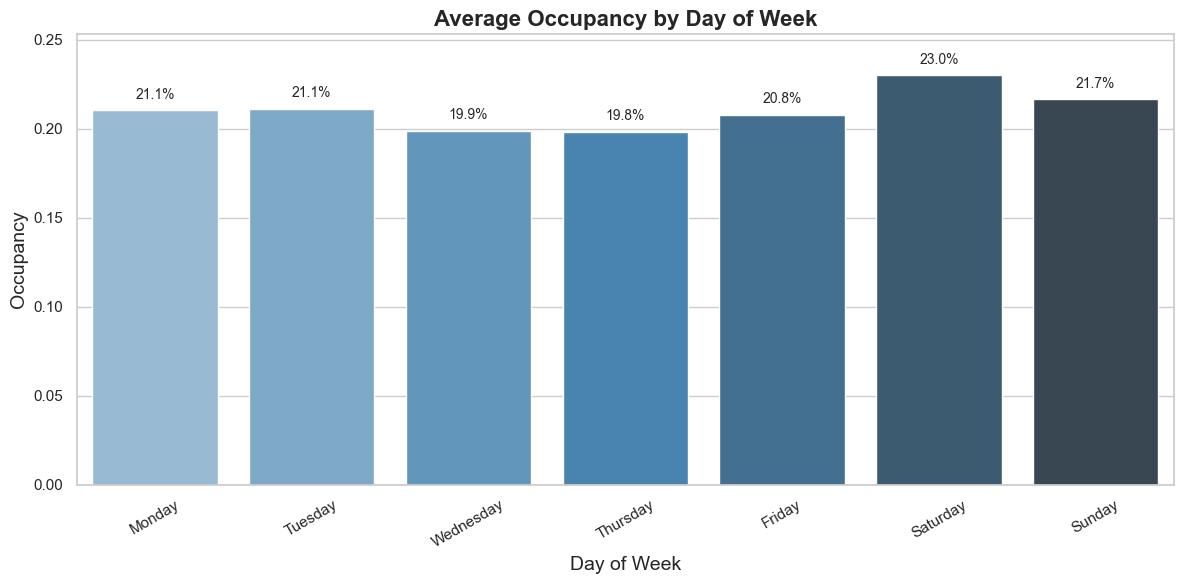

<Figure size 1200x600 with 0 Axes>

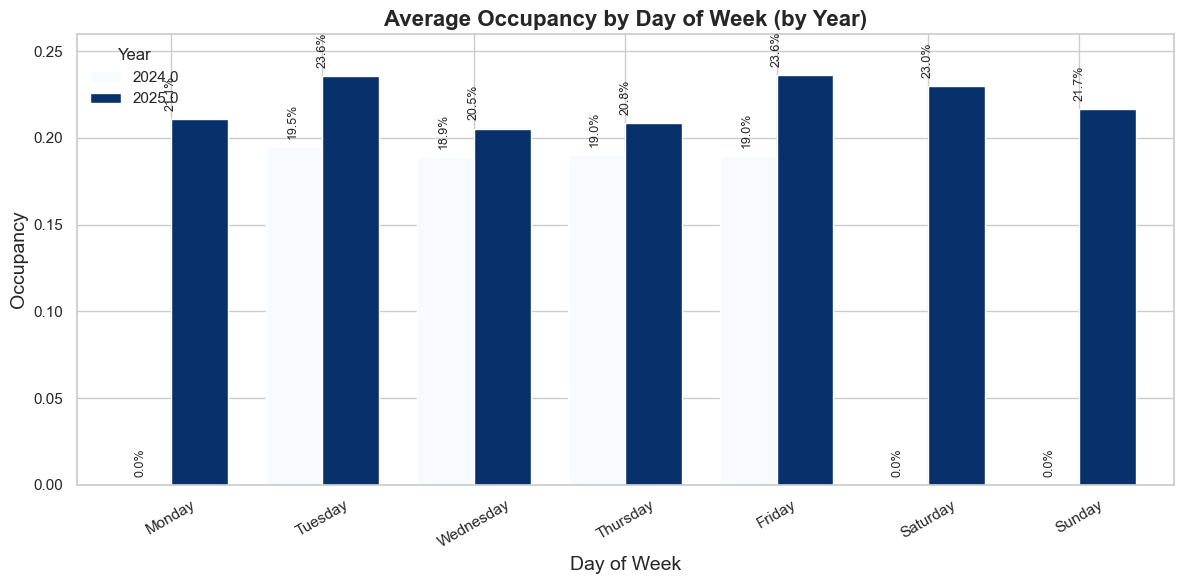

In [118]:
# Overall averages
plot_dow_occupancy(master_df)

# Yearly comparison
plot_dow_occupancy(master_df, by_year=True)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


sns.set_style("whitegrid")
plt.rcParams.update({"font.size": 12})


def plot_revenue_occupancy_dashboard(df, date_col="date_x", revenue_col="revenue", occ_col="occupancy", occ_by_year=False):
    """
    Creates a dashboard with:
      - Monthly/Year-Month revenue trend
      - Average occupancy by day of week (optionally by year)
    """

    # Ensure datetime
    df[date_col] = pd.to_datetime(df[date_col], errors="coerce")

    if df[date_col].isna().all():
        print("No valid dates in column:", date_col)
        return

    # Extract time parts
    df["year"] = df[date_col].dt.year
    df["month"] = df[date_col].dt.month
    df["year_month"] = df[date_col].dt.to_period("M")
    df["day_of_week"] = df[date_col].dt.day_name()

    # -------------------------------
    # Prepare revenue data
    # -------------------------------
    unique_years = df["year"].nunique()
    unique_months = df["month"].nunique()

    if unique_years == 1 and unique_months > 1:
        monthly_rev = df.groupby("month")[revenue_col].mean().fillna(0)
        rev_x = monthly_rev.index
        rev_labels = [calendar.month_abbr[int(m)] for m in rev_x]
        rev_xlabel = "Month"
    else:
        monthly_rev = df.groupby("year_month")[revenue_col].mean().fillna(0)
        rev_x = range(len(monthly_rev))
        rev_labels = monthly_rev.index.astype(str)
        rev_xlabel = "Year-Month"

    # -------------------------------
    # Prepare occupancy data
    # -------------------------------
    dow_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

    if occ_by_year:
        dow_occ = (
            df.groupby(["year", "day_of_week"])[occ_col]
            .mean()
            .unstack(level=0)
            .reindex(dow_order)
            .fillna(0)
        )
    else:
        dow_occ = df.groupby("day_of_week")[occ_col].mean().reindex(dow_order).fillna(0)

    # -------------------------------
    # Plotting
    # -------------------------------
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))

    # Revenue trend
    sns.lineplot(
        x=rev_x,
        y=monthly_rev.values,
        marker="o",
        color="#1f77b4",
        linewidth=2,
        ax=axes[0]
    )
    offset = 0.05 * max(monthly_rev.values) if monthly_rev.values.size else 0
    for x, y in zip(rev_x, monthly_rev.values):
        axes[0].text(x, y + offset, f"{y:,.0f}", ha="center", va="bottom", fontsize=9)

    axes[0].set_title("Average Revenue Trend", fontsize=16, fontweight="bold")
    axes[0].set_xlabel(rev_xlabel, fontsize=14)
    axes[0].set_ylabel("Revenue", fontsize=14)
    axes[0].set_xticks(rev_x)
    axes[0].set_xticklabels(rev_labels, rotation=30)
    axes[0].grid(alpha=0.3)

    # Occupancy
    if occ_by_year:
        dow_occ.plot(kind="bar", ax=axes[1], colormap="Blues", width=0.75)
        axes[1].set_title("Average Occupancy by Day of Week (by Year)", fontsize=16, fontweight="bold")
        axes[1].set_ylabel("Occupancy", fontsize=14)
        axes[1].set_xlabel("Day of Week", fontsize=14)
        axes[1].set_xticklabels(dow_order, rotation=30)
        axes[1].legend(title="Year")
        axes[1].set_ylim(0, dow_occ.max().max() * 1.1 if dow_occ.max().max() > 0 else 1)

    else:
        sns.barplot(x=dow_occ.index, y=dow_occ.values, palette="Blues_d", ax=axes[1])
        offset = 0.02 * dow_occ.max() if dow_occ.max() > 0 else 0.01
        for i, val in enumerate(dow_occ.values):
            axes[1].text(i, val + offset, f"{val:.1%}", ha="center", va="bottom", fontsize=9)

        axes[1].set_title("Average Occupancy by Day of Week", fontsize=16, fontweight="bold")
        axes[1].set_ylabel("Occupancy", fontsize=14)
        axes[1].set_xlabel("Day of Week", fontsize=14)
        axes[1].set_xticklabels(dow_occ.index, rotation=30)
        axes[1].set_ylim(0, dow_occ.max() * 1.1 if dow_occ.max() > 0 else 1)

    plt.tight_layout()
    plt.show()


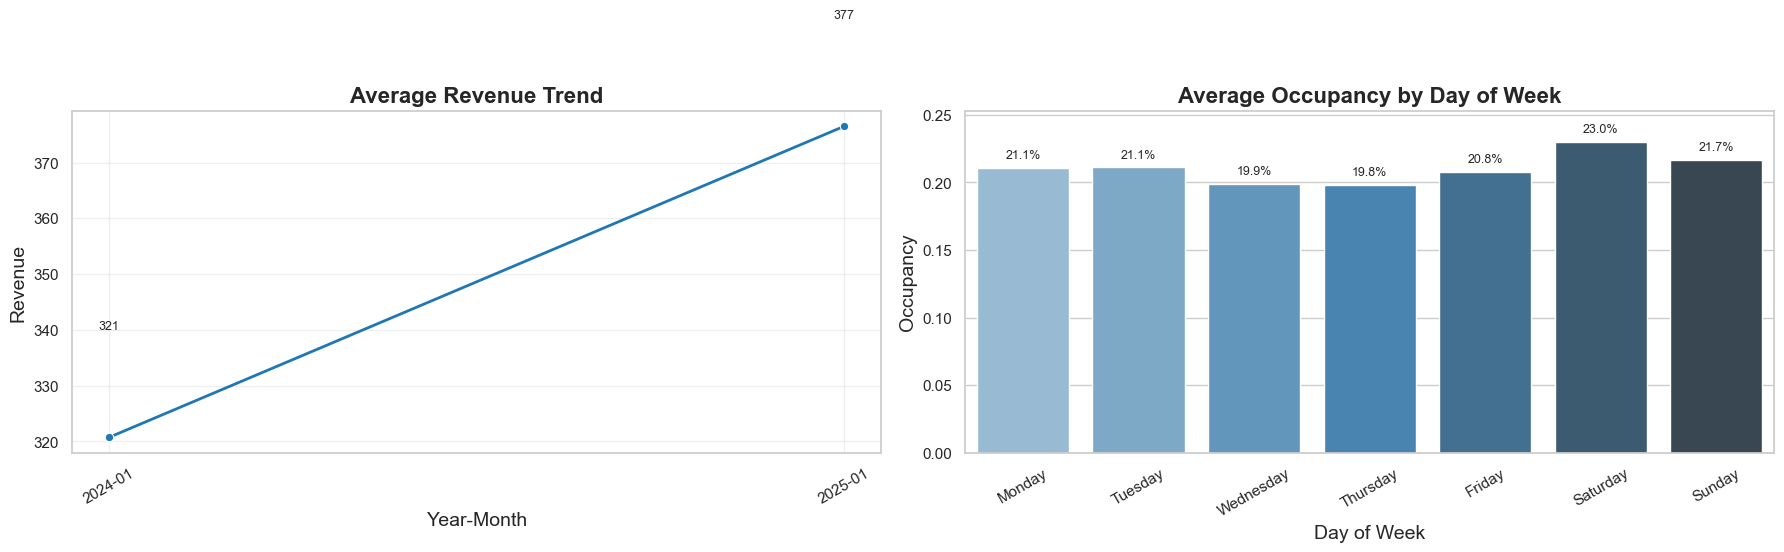

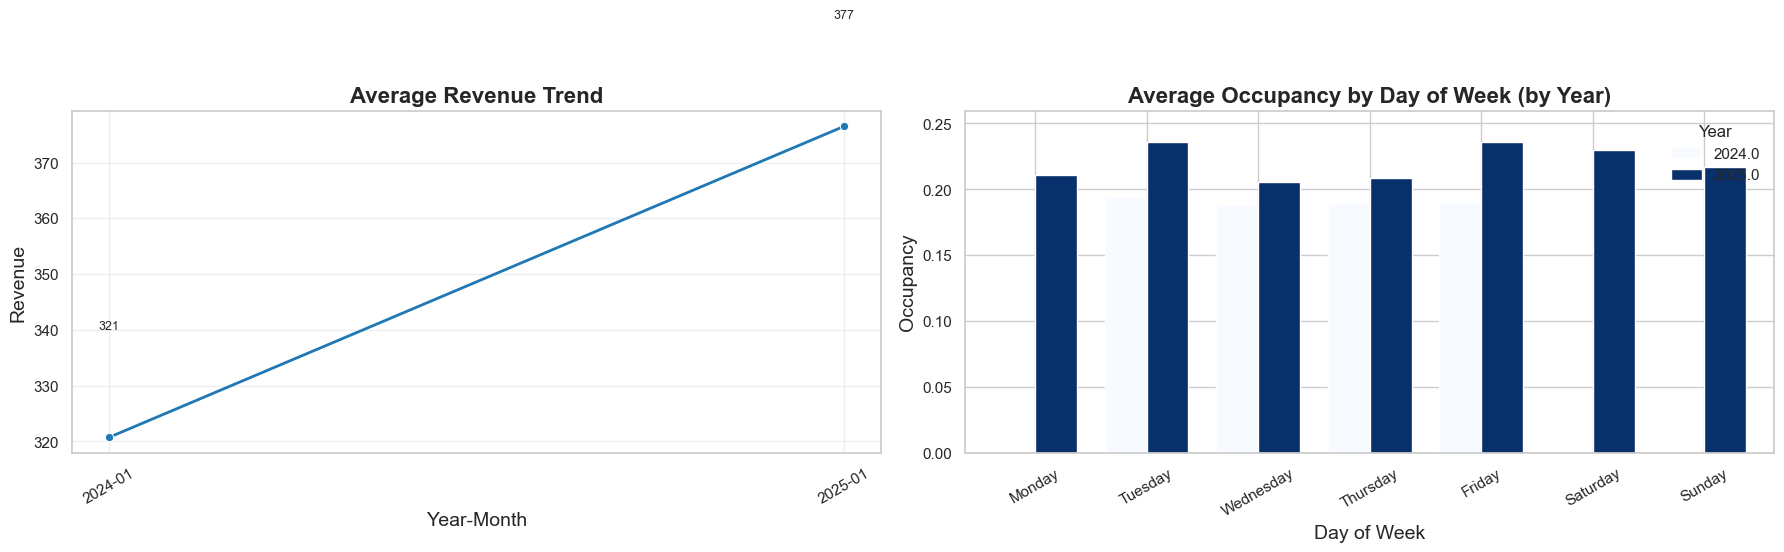

In [120]:
# Dashboard with overall averages
plot_revenue_occupancy_dashboard(master_df)

# Dashboard with occupancy broken down by year
plot_revenue_occupancy_dashboard(master_df, occ_by_year=True)


- **Average Revenue by Month:**  
  - **Peaks:** April (438) and August (511), with August being the highest, indicating periods of high demand.  
  - **Troughs:** January (306), December (304), and October (310), reflecting lower-demand periods.  
  - **Trend:** Revenue shows **monthly fluctuations**, with late-year and early-year months generally lower and mid-year months higher.  

- **Average Occupancy by Day of Week:**  
  - **Highest:** Saturday (22.1%), Tuesday (21.6%), Thursday (21.7%).  
  - **Lowest:** Monday (0.0%), Wednesday (19.1%), Sunday (19.7%).  
  - **Trend:** Occupancy is generally lower on weekdays, with a peak on Saturday. Monday shows particularly low occupancy, likely because **most bookings occur over the weekend**, so fewer listings are occupied at the start of the week.